# #理论部分

Can you come up out 3 sceneraies which use AI methods?
Ans:自动驾驶、知识图谱、人机对话

How do we use Github; Why do we use Jupyter and Pycharm？
Ans:Jupyter: 演示和学习
   Pycharm: 大型项目的程序开发

What's the Probability Model?
Ans:描述变量之间关系的数学模型

Can you came up with some sceneraies at which we could use Probability Model?
Ans:股价预测、人民币发行和物价波动的关系、人脸识别的相似度

4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
Ans:不晓得

What's the Language Model;
Ans:语言概率模型：计算一句文本成为一句合理表达语言的概率。概率趋向1表示该句文本是合理表达的人类语言，趋于0反之。
    Pro（w1,w2,w3，w4） = Pro(w1|w2w3w4) * Pro(w2|w3w4) * Pro(w3|w4) * Pro(w4)

Can you came up with some sceneraies at which we could use Language Model?
Ans:计算生成句子的合理性、对句子中的词标注词性

What's the 1-gram language model?
Ans:句子中每个词出现的概率都是独立的，与前后文无关。

What's the disadvantages and advantages of 1-gram language model;
Ans:缺点-句子组成的不合理性增加
   优点-计算复杂度降低

What't the 2-gram models;
Ans:Pro（w1,w2,w3，w4） = Pro(w1|w2) * Pro(w2|w3) * Pro(w3|w4) * Pro(w4)
   每一个词出现的概率和该词的下一个词与有关

# #编程实践部分

1. 设计你自己的句子生成器

In [19]:
#第一个语法 学生的语言
student = """
student = 学生 做 作业
学生 = 高中生 | 大学生 | 研究生 
做 = 检查 | 阅读 | 抄写
作业 = 试卷 | 习题
"""

In [263]:
#第二个语法 健身房的销售人员
salesmen = """
salesmen = 寒暄 询问 健身 熟悉 结尾 
寒暄 = 称谓 您好 
称谓 = 美女 | 帅哥 | 大爷
询问 = 请问 | 打扰一下
健身 = 有氧 | 有氧 健身 
有氧 = 游泳 | 瑜伽 | 舞蹈
舞蹈 = 拉丁 | 街舞
熟悉 = 了解 | 体验
结尾 = 一下么？"""

In [227]:
def create_grammar(grammar_string,split="=",split_line = "\n"):
    grammar = dict()
    for line in grammar_string.split(split_line):
        if not line.strip():  continue
        exp ,stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar
create_grammar(salesmen)

{'salesmen': [['寒暄', '询问', '健身', '熟悉', '结尾']],
 '寒暄': [['称谓', '您好']],
 '称谓': [['美女'], ['帅哥'], ['大爷']],
 '询问': [['请问'], ['打扰一下']],
 '健身': [['有氧'], ['有氧', '健身']],
 '有氧': [['游泳'], ['瑜伽'], ['舞蹈']],
 '舞蹈': [['拉丁'], ['街舞']],
 '熟悉': [['了解'], ['体验']],
 '结尾': [['一下么？']]}

In [83]:
import random
choice = random.choice

In [200]:
def generate(gram,target,join_str=" "):
    if target not in gram : return target
    expanded = [generate(gram,t) for t in choice(gram[target])]  #会生成None
    return join_str.join([s if s != "/n" else "\n" for s in expanded ])

In [222]:
# print(create_grammar(salesmen))
generate(create_grammar(salesmen),"salesmen")   #问题：迭代选择中如何去重呢（与数字拼接无需去重不一样的情景）

'帅哥 您好 请问 游泳 瑜伽 游泳 拉丁 瑜伽 游泳 游泳 街舞 体验 一下么？'

In [260]:
def generate_n(gram,target,num):
    sentence_list = []
    for i in range(num):
        sentence = generate(gram,target,"")
        sentence_list.append(sentence)
#         print("sentence {}:{}".format(i,sentence))
    return sentence_list

In [243]:
generate_n(create_grammar(student),"student",10)

['高中生抄写习题',
 '大学生阅读习题',
 '高中生检查试卷',
 '高中生抄写习题',
 '研究生抄写试卷',
 '高中生检查习题',
 '高中生检查习题',
 '大学生抄写习题',
 '研究生阅读试卷',
 '大学生阅读习题']

2. 使用新数据源完成语言模型的训练

In [128]:
import pandas as pd

In [133]:
filename = "movie_comments.csv"
movie_content = pd.read_csv(filename)
movie_content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [136]:
comments = movie_content["comment"].tolist()
len(comments)

261497

In [178]:
import re
import jieba
from collections import Counter
import matplotlib.pyplot as plt

In [155]:
#获得纯文本
def tokens(string):
    return "".join(re.findall("\w+",string))
print(comments[120] + "\n")
print(tokens(comments[120]))

1.设定有点像好莱坞动作片那一套，男主的女人总立flag，不是消失就是疑似扑街。2.太极宗师后，半红不紫多年，吴京很厉害，靠战狼系列走出条自己的动作片路线：金链大哥片，糙汉の最爱。3.能看出007，碟中谍，史泰龙，斯坦森影子在。4.好莱坞团队对爆米花片总体质量提升，战狼2比第1部更紧凑了。7分。

1设定有点像好莱坞动作片那一套男主的女人总立flag不是消失就是疑似扑街2太极宗师后半红不紫多年吴京很厉害靠战狼系列走出条自己的动作片路线金链大哥片糙汉の最爱3能看出007碟中谍史泰龙斯坦森影子在4好莱坞团队对爆米花片总体质量提升战狼2比第1部更紧凑了7分


In [154]:
#文本切词
def cut(string):
    return list(jieba.cut(string))

In [177]:
#建立词-词频表
TOKEN = []
for line in comments:
    line_clean =tokens(str(line)).strip()
    if not line_clean: continue
    TOKEN.extend(cut(line_clean))
word_count = Counter(TOKEN)
word_count.most_common(100)

[('的', 328262),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290),
 ('在', 31245),
 ('不', 28435),
 ('有', 27939),
 ('就', 25685),
 ('人', 23909),
 ('好', 22858),
 ('啊', 20803),
 ('这', 17484),
 ('还', 17449),
 ('一个', 17343),
 ('你', 17282),
 ('还是', 16425),
 ('但', 15578),
 ('故事', 15010),
 ('没有', 14343),
 ('就是', 14007),
 ('喜欢', 13566),
 ('让', 13304),
 ('太', 12676),
 ('又', 11566),
 ('剧情', 11359),
 ('没', 10858),
 ('说', 10764),
 ('吧', 10747),
 ('他', 10675),
 ('不错', 10416),
 ('得', 10349),
 ('到', 10341),
 ('给', 10300),
 ('这个', 10058),
 ('上', 10054),
 ('被', 9939),
 ('对', 9824),
 ('最后', 9694),
 ('一部', 9693),
 ('片子', 9590),
 ('什么', 9571),
 ('能', 9532),
 ('与', 9168),
 ('多', 8977),
 ('可以', 8972),
 ('不是', 8811),
 ('最', 8669),
 ('觉得', 8626),
 ('中', 8446),
 ('导演', 8390),
 ('自己', 8354),
 ('拍', 8172),
 ('好看', 8085),
 ('要', 8081),
 ('真的', 7908),
 ('感觉', 7828),
 ('但是', 7723),
 ('里', 7655),
 ('那', 7503),
 ('有点', 7479),
 ('想', 74

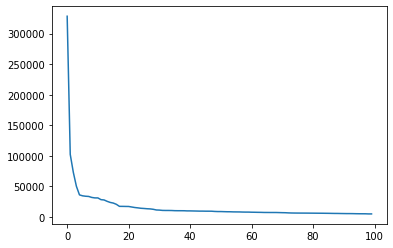

In [182]:
#画图展示
frequency = [f for w,f in word_count.most_common(100)]
x = [i for i in range(len(frequency))]
plt.plot(x,frequency)

In [185]:
#计算概率
TOKEN_2_GRAM =["".join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
print(TOKEN[:10])
print(TOKEN_2_GRAM[:10])

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']
['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']


In [187]:
word_count_2 = Counter(TOKEN_2_GRAM)
word_count_2.most_common(10)

[('的电影', 8640),
 ('看的', 7106),
 ('都是', 6335),
 ('让人', 5284),
 ('的故事', 4709),
 ('看了', 4585),
 ('也是', 4408),
 ('的时候', 4398),
 ('的人', 4356),
 ('的是', 4348)]

In [195]:
#计算概率
def prob_2(word1,word2):
    if word1 + word2 in word_count_2:
        return word_count_2[word1 + word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)
print(prob_2("电影","好看"))
print(prob_2("电影","好丑"))

1.581182238824883e-05
2.2270172377815255e-07


In [197]:
#计算一句话的概率
def prob_sentence(sentence):
    words = cut(sentence)
    prob_sent = 1
    for i,w in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(w,next_)
        prob_sent *= probability
    return prob_sent
prob_sentence("女主角真漂亮")

2.916248197097121e-11

In [228]:
#送入之前定义的语言模型中，判断文本的合理程度
sentence = generate(create_grammar(salesmen),"salesmen","") 
"{} 生成概率是：{}".format(sentence,prob_sentence(sentence))

'帅哥 您好请问街舞了解一下么？ 生成概率是：4.719361351489784e-52'

3. 获得最优质的的语言

In [250]:
sentence_list = generate_n(gram=create_grammar(salesmen),target="salesmen",num=10)
sentence_list

['帅哥 您好打扰一下游泳 游泳 瑜伽 瑜伽体验一下么？',
 '美女 您好请问瑜伽 拉丁 街舞了解一下么？',
 '美女 您好请问瑜伽 游泳体验一下么？',
 '美女 您好打扰一下游泳体验一下么？',
 '帅哥 您好打扰一下游泳 游泳 瑜伽了解一下么？',
 '帅哥 您好打扰一下瑜伽体验一下么？',
 '大爷 您好打扰一下游泳体验一下么？',
 '美女 您好请问瑜伽了解一下么？',
 '美女 您好打扰一下瑜伽 瑜伽 游泳 瑜伽了解一下么？',
 '大爷 您好打扰一下瑜伽 游泳 瑜伽体验一下么？']

In [264]:
def generate_best(sentences):
    prob_list = [prob_sentence(sent) for sent in sentences]
    sent_prob = list(zip(sentences,prob_list))
    sorted(sent_prob,key=lambda x: x[1], reverse=True)
    best_sent = sent_prob[0]
    print("可能性最高的语句是：{}，生成概率为：{}".format(best_sent[0],best_sent[1]))
generate_best(sentence_list)

可能性最高的语句是：帅哥 您好打扰一下游泳 游泳 瑜伽 瑜伽体验一下么？，生成概率为：1.972581361708231e-99


3.1 这个模型有什么问题，如何提升？
Ans:迭代生成健身方式中会出现重复的选择（比如 瑜伽、瑜伽），需要去重（与课上所讲的数字拼接无需去重不一样的情景）
   两个词的条件概率【prob_2】计算觉得怪怪的，P(w1|w2) = P(w1,w2)/P(w2),为啥句子生成概率最后就直接是所有二元词的联合概率累积?
   尚不知道如何提升...